In [51]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,ConfusionMatrixDisplay

In [52]:
dffish = pd.read_csv('fish_data.csv')

In [53]:
dffish

,species,length,weight,w_l_ratio
0,Anabas testudineus,10.66,3.45,0.32
1,Anabas testudineus,6.91,3.27,0.47
2,Anabas testudineus,8.38,3.46,0.41
3,Anabas testudineus,7.57,3.36,0.44
4,Anabas testudineus,10.83,3.38,0.31
...,...,...,...,...
4075,Sillaginopsis panijus,30.56,6.12,0.20
4076,Sillaginopsis panijus,29.66,6.11,0.21
4077,Sillaginopsis panijus,32.81,6.25,0.19
4078,Sillaginopsis panijus,29.78,6.11,0.21


In [54]:
dffish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4080 entries, 0 to 4079
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   species    4080 non-null   object 
 1   length     4080 non-null   float64
 2   weight     4080 non-null   float64
 3   w_l_ratio  4080 non-null   float64
dtypes: float64(3), object(1)
memory usage: 127.6+ KB


In [55]:
dffish.describe()

,length,weight,w_l_ratio
count,4080.000000,4080.000000,4080.000000
mean,17.353544,3.739875,0.252782
std,7.114684,1.040365,0.123046
min,6.360000,2.050000,0.080000
25%,11.327500,3.070000,0.170000
50%,17.350000,3.310000,0.190000
75%,22.585000,4.100000,0.340000
max,33.860000,6.290000,0.640000


In [56]:
dffish.species.value_counts()

species
Setipinna taty            480
Anabas testudineus        476
Pethia conchonius         475
Otolithoides biauritus    468
Polynemus paradiseus      458
Sillaginopsis panijus     455
Otolithoides pama         435
Puntius lateristriga      418
Coilia dussumieri         415
Name: count, dtype: int64

In [57]:
x = dffish.drop(columns=['species'])
y = dffish['species']

print("x:",x.shape)
print("y:",y.shape)

x: (4080, 3)
y: (4080,)


In [58]:
y = dffish['species'].values
le = LabelEncoder().fit(y)
y = le.transform(y)
y

array([0, 0, 0, ..., 8, 8, 8])

In [59]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [60]:
scaler = StandardScaler()
scaler.fit(x_train)
scaler.fit(x_test)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [61]:
from sklearn.model_selection import GridSearchCV

logreg = LogisticRegression(n_jobs=6, class_weight='balanced')
param_grid = {
    
    'penalty': ['l1', 'l2', 'elasticnet'],
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    'l1_ratio': [0.1, 0.5, 0.7, 0.9],
    
}

grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 6.
  warnings.warn(
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn

GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced', n_jobs=6),
             param_grid={'l1_ratio': [0.1, 0.5, 0.7, 0.9],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='accuracy')

penalty: Parameter ini menentukan jenis regularisasi yang akan digunakan untuk mencegah overfitting:
'l1': Regularisasi Lasso.
'l2': Regularisasi Ridge.
'elasticnet': Kombinasi L1 dan L2 (diperlukan parameter l1_ratio).
solver: Solver adalah algoritma pengoptimalan yang digunakan untuk meminimalkan fungsi loss:
'lbfgs': Solver berbasis metode optimisasi quasi-Newton.
'liblinear': Solver untuk small dataset, mendukung L1 dan L2.
'newton-cg': Solver berbasis metode Newton.
'newton-cholesky': Solver untuk dataset besar.
'sag': Solver berbasis gradien stokastik untuk L2.
'saga': Solver berbasis gradien stokastik, mendukung L1, L2, dan elasticnet.
l1_ratio: Digunakan hanya jika penalty='elasticnet', menentukan proporsi antara L1 dan L2:
0.1: 10% L1, 90% L2.
0.5: Kombinasi seimbang antara L1 dan L2.
0.7 dan 0.9: Menekankan regularisasi L1.

In [62]:
np.round
print(f'Best Score : {grid_search.best_score_}')

best_params = grid_search.best_estimator_.get_params()
print(f'Best Parameter')
for param in param_grid:
    print(f'\t{param} : {best_params[param]}') 


Best Score : 0.9335196685425455
Best Parameter
	penalty : l1
	solver : saga
	l1_ratio : 0.1


In [63]:
y_pred = grid_search.predict(x_test)
y_pred

array([6, 4, 3, 4, 5, 8, 6, 5, 8, 7, 5, 3, 2, 4, 7, 3, 2, 1, 8, 3, 7, 1,
       7, 6, 0, 1, 6, 1, 7, 5, 3, 3, 4, 5, 6, 7, 7, 8, 4, 4, 8, 7, 0, 7,
       1, 2, 7, 7, 5, 6, 1, 5, 2, 4, 0, 6, 2, 1, 1, 2, 3, 8, 3, 1, 1, 3,
       1, 3, 3, 1, 2, 4, 7, 8, 6, 5, 7, 5, 4, 0, 7, 6, 6, 7, 2, 1, 7, 6,
       7, 8, 6, 4, 4, 6, 0, 7, 0, 4, 2, 1, 8, 4, 4, 0, 8, 3, 8, 7, 5, 2,
       1, 0, 7, 8, 2, 7, 0, 8, 5, 8, 7, 2, 1, 2, 0, 1, 4, 0, 3, 4, 0, 4,
       7, 3, 1, 8, 8, 4, 7, 7, 8, 0, 0, 8, 5, 5, 2, 7, 7, 6, 3, 7, 0, 1,
       3, 4, 0, 5, 1, 8, 3, 3, 2, 8, 3, 1, 7, 7, 1, 7, 0, 2, 2, 2, 4, 5,
       8, 3, 0, 5, 2, 4, 6, 6, 1, 4, 1, 4, 8, 8, 5, 1, 5, 0, 4, 0, 3, 3,
       5, 3, 4, 0, 6, 4, 0, 4, 8, 2, 6, 8, 8, 3, 4, 8, 1, 5, 6, 8, 4, 0,
       8, 3, 6, 2, 2, 0, 3, 4, 7, 6, 0, 7, 5, 8, 4, 8, 2, 5, 5, 5, 1, 8,
       3, 8, 3, 6, 4, 6, 1, 0, 1, 1, 0, 4, 7, 2, 8, 5, 2, 8, 5, 5, 7, 7,
       4, 4, 2, 1, 1, 7, 1, 1, 1, 4, 8, 2, 6, 8, 8, 2, 0, 0, 1, 8, 5, 4,
       1, 1, 3, 4, 7, 4, 8, 3, 8, 3, 2, 2, 1, 8, 5,

In [64]:
new_data = [[7.57,3.36,0.44]]
new_pred = grid_search.predict(new_data)
inevers = le.inverse_transform(new_pred)
print(inevers)

['Sillaginopsis panijus']


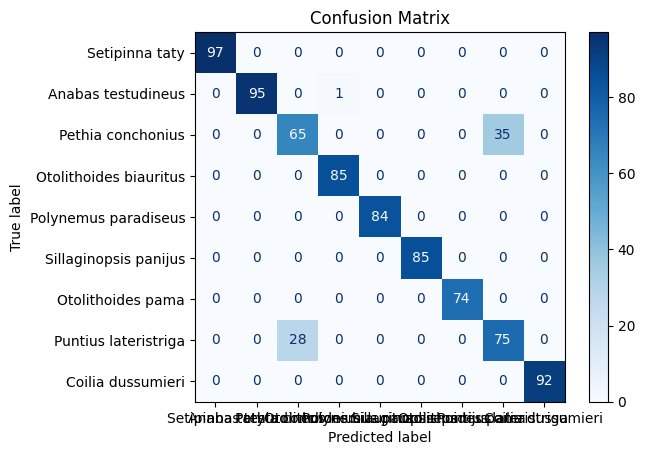

In [66]:
cm = confusion_matrix(y_test, y_pred)

labels = ['Setipinna taty', 'Anabas testudineus', 'Pethia conchonius', 
          'Otolithoides biauritus', 'Polynemus paradiseus', 
          'Sillaginopsis panijus', 'Otolithoides pama', 
          'Puntius lateristriga', 'Coilia dussumieri']

# Tampilkan confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [67]:
import pickle
fw = open('lr_fish.pkl', 'wb')
pickle.dump(grid_search , fw)